## Chapter 06: An overview of scientific libaries

Further to Sympy, this lab sheet will give a brief overview of a number of popular Python libraries that can be used to tackle a number of different problems:

- [numpy](http://www.numpy.org/) efficient numeric computations (for example for efficient linear algebra);
- [matplotlib](https://matplotlib.org/) plotting;
- [scipy](https://docs.scipy.org/doc/scipy/reference/) a general purpose scientif library (for example include algorithms for numeric optimisation);
- [networkx](https://networkx.github.io/) network/graph theory (for example to compute the chromatic number of a graph);
- [pandas](https://pandas.pydata.org/) data manipulation (for example to read data from a given source and manipulate it);
- [scikit-learn](http://scikit-learn.org) machine learning (this is one of Python's most popular libraries).


This lab sheet will not good a detailed overview of each library but aim to give a brief introduction to each.



### Numpy - http://www.numpy.org/

This is a fundamental library for efficient numeric computation. The building block is the `numpy.array` which can also be used to carry out linear algebraic manipulation.

Let us import `numpy` and define two 3 by 3 matrices:

In [1]:
import numpy as np
A = np.array([[5, 1, -1], [-1, 2, 4], [1, 1, 1]])
B = np.array([[1, 2, 0], [-4, 2, 2], [1, 3, 1]])

We can access \\(A_{02}\\) for example:

In [2]:
A[0, 2]

-1

Or an entire row of \\(A\\):

In [3]:
A[0]

array([ 5,  1, -1])

Or an entire column:

In [4]:
A[:,1]

array([1, 2, 1])

We can do scalar multiplication:

In [5]:
5 * A

array([[25,  5, -5],
       [-5, 10, 20],
       [ 5,  5,  5]])

We can raise the matrix to a high power:

In [6]:
np.linalg.matrix_power(A, 20)

array([[33560473923573, 14496923401020,  6487017577736],
       [ 1241032333047,   561674209891,   281855912501],
       [ 9250938156331,  4004952911642,  1802706542938]])

We can carry out matrix addition:

In [7]:
A + B

array([[ 6,  3, -1],
       [-5,  4,  6],
       [ 2,  4,  2]])

But also more complex things like matrix multiplication:

In [8]:
np.dot(A, B)

array([[ 0,  9,  1],
       [-5, 14,  8],
       [-2,  7,  3]])

We can also get the inverse and the determinant of a \\(A\\):

In [9]:
np.linalg.inv(A), np.linalg.det(A)

(array([[ 1. ,  1. , -3. ],
        [-2.5, -3. ,  9.5],
        [ 1.5,  2. , -5.5]]), -2.0)

Numpy also has numerous helpful functions that can be useful even if we are not doing any linear algebra. For example let us get an array of 100 values between `-2` and `1`:

In [10]:
np.linspace(-2, 1, 10 ** 2)

array([-2.        , -1.96969697, -1.93939394, -1.90909091, -1.87878788,
       -1.84848485, -1.81818182, -1.78787879, -1.75757576, -1.72727273,
       -1.6969697 , -1.66666667, -1.63636364, -1.60606061, -1.57575758,
       -1.54545455, -1.51515152, -1.48484848, -1.45454545, -1.42424242,
       -1.39393939, -1.36363636, -1.33333333, -1.3030303 , -1.27272727,
       -1.24242424, -1.21212121, -1.18181818, -1.15151515, -1.12121212,
       -1.09090909, -1.06060606, -1.03030303, -1.        , -0.96969697,
       -0.93939394, -0.90909091, -0.87878788, -0.84848485, -0.81818182,
       -0.78787879, -0.75757576, -0.72727273, -0.6969697 , -0.66666667,
       -0.63636364, -0.60606061, -0.57575758, -0.54545455, -0.51515152,
       -0.48484848, -0.45454545, -0.42424242, -0.39393939, -0.36363636,
       -0.33333333, -0.3030303 , -0.27272727, -0.24242424, -0.21212121,
       -0.18181818, -0.15151515, -0.12121212, -0.09090909, -0.06060606,
       -0.03030303,  0.        ,  0.03030303,  0.06060606,  0.09

---

#### Further resources for numpy

- [Scipy-lecture notes on numpy](https://www.scipy-lectures.org/intro/numpy/index.html)
- [Numpy quick start tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)

### Matplotlib - https://matplotlib.org/

This is the most popular Python library for creating plots. We will illustrate first by creating a plot of the function:

\\[
    -x ^ 4 + 9x ^ 2 + 4 x - 12
\\]

We do this by creating a set of \\(x\\) values and computing the corresponding set of \\(f(x)\\) values:

In [11]:
def f(x):
    return - x ** 4 + 9 * x ** 2 + 4 * x - 12

xs = np.linspace(-4, 5, 10 ** 3)  # Create 1000 points
ys = [f(x) for x in xs]

We are now ready to import and use matplotlib:

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(xs, ys)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show();  # Note the `;` which ensures the plot gets shown here

<Figure size 640x480 with 1 Axes>

We can also save that image to a file that can be used elsewhere:

In [13]:
plt.savefig("plot.pdf")   # experiment with `.png`, `.jpg` etc...

<Figure size 432x288 with 0 Axes>

Note that there are numerous other types of plots that can be obtained, for example here is a histogram of 1000 random values generated by numpy:

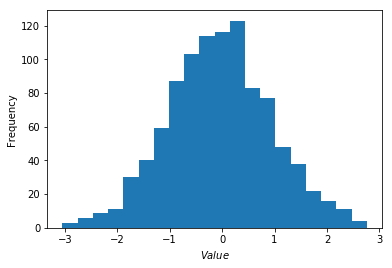

In [14]:
np.random.seed(0)  # Setting a seed
values = np.random.normal(size=10 ** 3)
plt.figure()
plt.hist(values, bins=20)
plt.xlabel("$Value$")
plt.ylabel("Frequency")
plt.show();

----

#### Further resources for matplotlib

- [Matplotlib tutorial](https://matplotlib.org/users/pyplot_tutorial.html)
- [Interactive matplotlib tutorial](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)

### Scipy - https://docs.scipy.org/doc/scipy/reference/

Scipy is a library bringing together many different capabilities. One thing it can do is find roots using numeric approximation techniques:

In [15]:
from scipy import optimize

In [16]:
optimize.root(f, x0=0)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([4.84234874e-12])
       r: array([49.99999584])
  status: 1
 success: True
       x: array([3.])

In [17]:
f(3)

0

It can also minimize functions (of more than one variable):

In [18]:
def g(x):
    """Here we assume g is a function of 2 variables and x is a vector"""
    return np.cos(x[1]) / (1 + x[0])

In [19]:
optimize.minimize(g, x0=[0, 0])

      fun: 0.002697614111595088
 hess_inv: array([[7.11535655e+06, 5.36889474e+00],
       [5.36889474e+00, 1.00000405e+00]])
      jac: array([-7.27712177e-06, -7.03148544e-07])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 20
     njev: 21
   status: 0
  success: True
        x: array([3.6969793e+02, 2.6064249e-04])

We can also fit a function to date, here we will create some data that fits a curve, add some noise and try and recover the function:

In [20]:
def func(x, a, b):
    return a * x ** 2 + b

xs = np.linspace(0, 10, 50)
a_value, b_value = 1 / 2, 70
np.random.seed(0)
ys = [func(x, a=a_value, b=b_value) + 2 * np.random.random() for x in xs]

Let us take a look at the data:

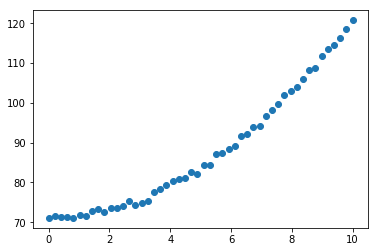

In [21]:
plt.figure()
plt.scatter(xs, ys)
plt.show();

In [22]:
popt, pcov = optimize.curve_fit(func, xs, ys)

We recover the original used values of `a` and `b`:

In [23]:
popt

array([ 0.49563406, 71.22294657])

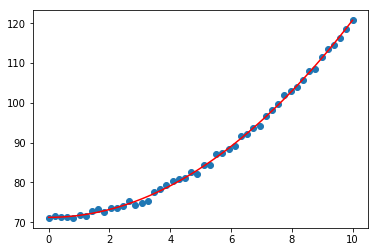

In [24]:
fitted_ys = [func(x, *popt) for x in xs]
plt.scatter(xs, ys, label="Original data")
plt.plot(xs, fitted_ys, label="Fitted data", color="red");

---

#### Further resources for scipy

- [Scipy lecture notes](https://www.scipy-lectures.org/)

### Networkx - https://networkx.github.io/

Networkx is used to handle graph theoretic objects. We can create a matrix in a number of ways, one of the simplest is by passing a set of edges. Here we import the library and create a graph object:

In [25]:
import networkx as nx
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]
G = nx.Graph(edges)
G

It is possible to obtain the adjacency matrix of the graph:

In [26]:
M = nx.to_numpy_array(G)
M

array([[0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

It is also possible to draw the graph:

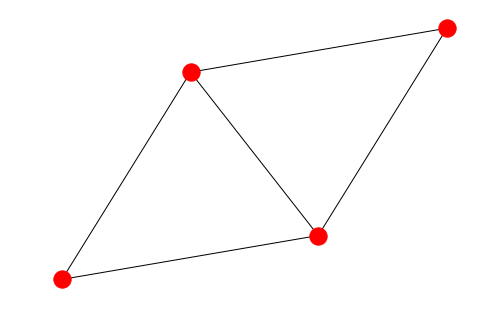

In [27]:
plt.figure()
nx.draw(G);

We can also compute a graph coloring:

In [28]:
coloring = nx.greedy_color(G)
coloring

{0: 0, 1: 1, 2: 2, 3: 2}

We see that the chromatic number of this graph is 3:

In [29]:
len(set(coloring.values()))

3

---

#### Further resources for networkx

- [Networkx tutorial](https://networkx.github.io/documentation/stable/tutorial.html)
- [The chinese postman problem with networkx](https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial)
- [Analysing Game of Thrones with networkx](https://nikoleta-v3.github.io/blog/2017/10/19/python-graphs-got.html)

### Pandas - https://pandas.pydata.org/

Pandas is Python's main library for data manipulation. As an example let us consider this dataset about extra marrital afairs:  `affairs.csv` ([download](/{{root}}/nbs/chapters/affairs.csv)). This is data from the following research paper:

> Fair, Ray C. "A theory of extramarital affairs." Journal of Political Economy 86.1 (1978): 45-61.

A pdf can be found here: https://fairmodel.econ.yale.edu/rayfair/pdf/1978A200.PDF

Let us import pandas and read the dataset in:

In [30]:
import pandas as pd
df = pd.read_csv("affairs.csv")

We can look at the top of the data set:

In [31]:
df.head()

sex   age     ym child  religious  education  occupation  rate  \
0    male  37.0  10.00    no          3         18           7     4   
1  female  27.0   4.00    no          4         14           6     4   
2  female  32.0  15.00   yes          1         12           1     4   
3    male  57.0  15.00   yes          5         18           6     5   
4    male  22.0   0.75    no          2         17           6     3   

   nbaffairs  
0          0  
1          0  
2          0  
3          0  
4          0

From the paper we read that the variables are:

- `sex`: The reported gender of the individual;
- `age`: The age of the individual;
- `ym`: Number of years married;
- `child`: Whether or not the individual has a child;
- `religious`: How religious the individual is (`5`: "very", `1`: "not");
- `education`: Level of education (`9`: grade school, `20`: PhD or MD);
- `occupation`: Occupation based on a scalle called the "Hollingshead classification";
- `rate`: Individual rating of marriage (`5`: "very happy", `1`: "very unhappy").

We can obtain a quick overview of the data using the `describe()` method:

In [32]:
df.describe()

age          ym   religious   education  occupation        rate  \
count  601.000000  601.000000  601.000000  601.000000  601.000000  601.000000   
mean    32.487521    8.177696    3.116473   16.166389    4.194676    3.931780   
std      9.288762    5.571303    1.167509    2.402555    1.819443    1.103179   
min     17.500000    0.125000    1.000000    9.000000    1.000000    1.000000   
25%     27.000000    4.000000    2.000000   14.000000    3.000000    3.000000   
50%     32.000000    7.000000    3.000000   16.000000    5.000000    4.000000   
75%     37.000000   15.000000    4.000000   18.000000    6.000000    5.000000   
max     57.000000   15.000000    5.000000   20.000000    7.000000    5.000000   

        nbaffairs  
count  601.000000  
mean     1.455907  
std      3.298758  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max     12.000000

We can also choose to slice our data set in specific ways, for example how is the mean number of affairs related to the rating of the marriage and whether or not the individual is male or female?

In [33]:
df.groupby(["sex", "rate"])["nbaffairs"].mean()

sex     rate
female  1       4.545455
        2       3.371429
        3       1.782609
        4       0.967742
        5       0.823077
male    1       2.400000
        2       4.548387
        3       1.085106
        4       1.623762
        5       0.588235
Name: nbaffairs, dtype: float64

We can also choose to slice our data manually, for example let us only look at the data set for males:

In [34]:
df[df["sex"] == "male"]

sex   age      ym child  religious  education  occupation  rate  \
0    male  37.0  10.000    no          3         18           7     4   
3    male  57.0  15.000   yes          5         18           6     5   
4    male  22.0   0.750    no          2         17           6     3   
7    male  57.0  15.000   yes          2         14           4     4   
9    male  22.0   1.500    no          4         14           4     5   
10   male  37.0  15.000   yes          2         20           7     2   
11   male  27.0   4.000   yes          4         18           6     4   
12   male  47.0  15.000   yes          5         17           6     4   
24   male  37.0   4.000   yes          2         20           6     4   
27   male  42.0  15.000   yes          5         20           6     4   
28   male  27.0   4.000   yes          3         16           5     5   
30   male  42.0  15.000   yes          4         20           6     3   
32   male  27.0   0.417    no          4         17           6     4   
34   male  32.0   4.000   yes          1         18           6     4   
38   male  22.0   1.500   yes          1         14           3     5   
40   male  32.0  10.000   yes          5         20           6     5   
41   male  52.0  15.000   yes          5         18           6     3   
45   male  22.0   4.000    no          3         16           5     5   
48   male  27.0   1.500   yes          4         16           3     5   
49   male  42.0  15.000   yes          2         20           6     4   
51   male  32.0   7.000   yes          2         20           6     4   
52   male  27.0   4.000   yes          5         20           6     5   
53   male  27.0  10.000   yes          4         20           6     4   
54   male  22.0   4.000    no          1         18           5     5   
56   male  22.0   1.500   yes          5         16           4     4   
59   male  32.0  10.000   yes          4         20           6     4   
61   male  37.0  10.000   yes          3         20           6     4   
63   male  27.0   4.000    no          2         18           4     5   
64   male  32.0   7.000    no          4         20           6     4   
65   male  42.0  15.000   yes          2         17           3     5   
..    ...   ...     ...   ...        ...        ...         ...   ...   
548  male  42.0  15.000   yes          3         20           5     4   
549  male  32.0  10.000    no          2         18           4     2   
551  male  57.0  15.000   yes          5         20           4     5   
552  male  47.0  15.000   yes          4         20           6     4   
554  male  37.0  15.000   yes          3         17           6     3   
555  male  37.0  15.000   yes          5         17           5     2   
556  male  27.0  10.000   yes          2         20           6     4   
557  male  37.0  15.000   yes          2         16           5     4   
559  male  32.0  10.000   yes          3         17           6     3   
560  male  37.0  15.000   yes          4         18           5     1   
563  male  37.0  15.000   yes          2         17           5     4   
567  male  52.0   7.000    no          4         16           5     5   
574  male  32.0   4.000   yes          4         18           6     4   
577  male  32.0   7.000   yes          4         16           4     4   
578  male  37.0  15.000    no          3         14           6     2   
579  male  42.0  15.000   yes          3         16           6     3   
580  male  27.0   4.000   yes          1         18           5     4   
581  male  37.0  15.000   yes          4         20           7     3   
582  male  37.0  15.000   yes          3         20           6     4   
583  male  22.0   1.500    no          2         12           3     3   
584  male  32.0   4.000   yes          3         20           6     2   
585  male  32.0  15.000   yes          5         20           6     5   
587  male  47.0  15.000    no          1         18           6 

We can combine this with matplotlib to get a plot of the mean number of affairs based on rating by gender:

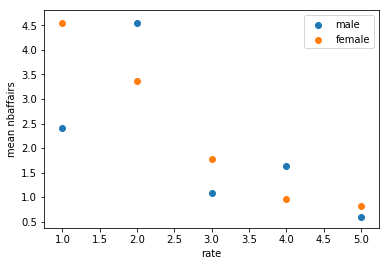

In [35]:
plt.figure()
for sex in ["male", "female"]:
    plt.scatter(range(1, 5 + 1), df[df["sex"] == sex].groupby("rate")["nbaffairs"].mean(), label=sex)
plt.legend()
plt.xlabel("rate")
plt.ylabel("mean nbaffairs");

#### Further resources for pandas

- [pandas tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [an interactive pandas tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)

### Scikit-learn - http://scikit-learn.org

The scikit learn library is a popular library for machine learning. As an example, let us aim to train a model that will predict whether or not someone will have an affair using the data above.

First let us create a new variable `male` and also change the `child`  variable to be a boolean and store this data in a new dataframe called `X` which will be used to predict a new variable a new variable `cheat` (stored in `y`):

In [36]:
df["bool_child"] = df["child"] == "yes"
df["male"] = df["sex"] == "male"
X = df[["age", "ym", "religious", "education", "rate", "occupation", "bool_child", "male"]]
y = df["nbaffairs"] > 0

Now let us import the specifit classifier for the algorithm we want to use:

In [37]:
from sklearn.ensemble import RandomForestClassifier

/home/vince/anaconda3/envs/cfm/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
seed = 3
clf = RandomForestClassifier(random_state=seed)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [39]:
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(feature, round(importance, 5))

age 0.18605
ym 0.12635
religious 0.18442
education 0.16467
rate 0.13675
occupation 0.12495
bool_child 0.02848
male 0.04834


The most important feature seems to be the `age` of the individual. Let us use our trained model to predict whether or not some given individual is likely to have an affair over their lifetime:

(0, 1)

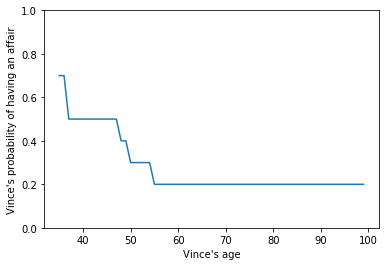

In [40]:
ages = range(35, 100)
probability_of_affair = []
for age in ages:
    ym = age - 24
    vince_knight = [[age, ym, 1, 20, 5, 3, True, True]]
    probability_of_affair.append(clf.predict_proba(vince_knight)[0][0])

plt.figure()    
plt.plot(ages, probability_of_affair)
plt.xlabel("Vince's age")
plt.ylabel("Vince's probability of having an affair")
plt.ylim(0, 1)

#### Further resources for scikit-learn

- [scikit-learn tutorials](http://scikit-learn.org/stable/tutorial/index.html)
- [an interactive scikit-learn tutorial](https://www.datacamp.com/community/tutorials/machine-learning-python)
- [A "gentle introduction" to scikit-learn](https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/)

---

**This is a brief overview of the type of thing each library can do, depending on what you want to do be sure to explore them fully and there are many other libraries in the Python ecosystem.**